In [1]:
%load_ext rpy2.ipython
# extension for using R cell magic in python

In [2]:
%%R
# loading R packages
library(phyloseq)
library(plyr)
library(dplyr)
#dplyr needs to come in last
library(ggplot2)
library(RColorBrewer)
library(reshape)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘reshape’


R[write to console]: The following object is masked from ‘package:dplyr’:

    rename


R[write to console]: The following objects are masked from ‘package:plyr’:

    rename, round_any




In [3]:
%%R
physeq = readRDS("ps.CON18.remake")

In [4]:
%%R
mdf = psmelt(physeq)

In [6]:
%%R
cutoff = 0
d = mdf %>%
    filter(VortexControl=="N")%>%
    dplyr::group_by(Sample) %>%
    dplyr::mutate(Abundance = Abundance / sum(Abundance))%>%
# Calculates the relative abundance of each OTU in each sample
    dplyr::group_by(TimesMixed,OTU)%>%
    dplyr::summarize(Abundance=mean(Abundance))%>%
    dplyr::filter(Abundance>cutoff)
# Calculates the mean relative abundance for each OTU for each treatment
d

`summarise()` has grouped output by 'TimesMixed'. You can override using the `.groups` argument.
# A tibble: 35,116 x 3
# Groups:   TimesMixed [7]
   TimesMixed OTU                                Abundance
   <ord>      <chr>                                  <dbl>
 1 Initial    002b96fe1edbe752c6b048f36aed25f6 0.0000121  
 2 Initial    00422fec6ce8ffe02d11aea487cb3982 0.00000344 
 3 Initial    005242ece918fd67a1d1aca5faa5aef3 0.00000120 
 4 Initial    00545cae7c2f53c4558a986be68852eb 0.0000171  
 5 Initial    005717333e49cece7632466d520386e3 0.0000128  
 6 Initial    005c8b5509b8936aa06ea7b15159f13f 0.0000134  
 7 Initial    007862615581197223ebb318f9ee70bd 0.000452   
 8 Initial    007d91802f5b025c74f9840897492e4e 0.0000481  
 9 Initial    007e21b6bbeda641cb8a50bdcbda542b 0.000000487
10 Initial    0086476ba0fe06c11b58b96a8410caa2 0.00000855 
# … with 35,106 more rows


In [7]:
%%R
test=t(cast(d,TimesMixed~OTU))
test =as.data.frame(as.matrix(test))
head(test)

R[write to console]: Using Abundance as value column.  Use the value argument to cast to override this choice



                                      Initial            1            2
000857c686dd3cfea79824469cf894f4           NA 1.698554e-06           NA
001dd1fdf62f064f20d8c93083cba456           NA 4.114116e-06           NA
001e6b1348503d2f21ec40d676cc502f           NA           NA 4.942900e-07
00289519e67b41b8654aa8dec95c45fa           NA           NA 9.885799e-07
002b96fe1edbe752c6b048f36aed25f6 1.207383e-05 1.347679e-05 4.233457e-06
00422fec6ce8ffe02d11aea487cb3982 3.435147e-06           NA 7.450410e-07
                                            4            8           16
000857c686dd3cfea79824469cf894f4           NA           NA           NA
001dd1fdf62f064f20d8c93083cba456           NA           NA           NA
001e6b1348503d2f21ec40d676cc502f           NA           NA           NA
00289519e67b41b8654aa8dec95c45fa           NA           NA           NA
002b96fe1edbe752c6b048f36aed25f6 1.385513e-05 9.933369e-06 1.420285e-05
00422fec6ce8ffe02d11aea487cb3982           NA           NA      

In [8]:
%%R
test=t(cast(d,TimesMixed~OTU))
test =as.data.frame(as.matrix(test))
colnames(test) = c("Initial","x1","x2","x4","x8","x16","x32")
test[is.na(test)]=0


test.Initial = test %>%
    arrange(-Initial)%>%
    mutate(Rank = c(1:dim(test)[1]))
test.Initial[,"CumulativeAbundance"] <- cumsum(test.Initial$Initial)
test.Initial$TimesMixed = "Initial"
test.Initial = subset(test.Initial, select = c("TimesMixed", "Rank", "CumulativeAbundance"))

test.x1 = test %>%
    arrange(-x1)%>%
    mutate(Rank = c(1:dim(test)[1]))
test.x1[,"CumulativeAbundance"] <- cumsum(test.x1$x1)
test.x1$TimesMixed = "x1"
test.x1 = subset(test.x1, select = c("TimesMixed", "Rank", "CumulativeAbundance"))

test.x2 = test %>%
    arrange(-x2)%>%
    mutate(Rank = c(1:dim(test)[1]))
test.x2[,"CumulativeAbundance"] <- cumsum(test.x2$x2)
test.x2$TimesMixed = "x2"
test.x2 = subset(test.x2, select = c("TimesMixed", "Rank", "CumulativeAbundance"))

test.x4 = test %>%
    arrange(-x4)%>%
    mutate(Rank = c(1:dim(test)[1]))
test.x4[,"CumulativeAbundance"] <- cumsum(test.x4$x4)
test.x4$TimesMixed = "x4"
test.x4 = subset(test.x4, select = c("TimesMixed", "Rank", "CumulativeAbundance"))

test.x8 = test %>%
    arrange(-x8)%>%
    mutate(Rank = c(1:dim(test)[1]))
test.x8[,"CumulativeAbundance"] <- cumsum(test.x8$x8)
test.x8$TimesMixed = "x8"
test.x8 = subset(test.x8, select = c("TimesMixed", "Rank", "CumulativeAbundance"))

test.x16 = test %>%
    arrange(-x16)%>%
    mutate(Rank = c(1:dim(test)[1]))
test.x16[,"CumulativeAbundance"] <- cumsum(test.x16$x16)
test.x16$TimesMixed = "x16"
test.x16 = subset(test.x16, select = c("TimesMixed", "Rank", "CumulativeAbundance"))

test.x32 = test %>%
    arrange(-x32)%>%
    mutate(Rank = c(1:dim(test)[1]))
test.x32[,"CumulativeAbundance"] <- cumsum(test.x32$x32)
test.x32$TimesMixed = "x32"
test.x32 = subset(test.x32, select = c("TimesMixed", "Rank", "CumulativeAbundance"))



R[write to console]: Using Abundance as value column.  Use the value argument to cast to override this choice



In [9]:
%%R
test.all = bind_rows(test.Initial, test.x1, test.x2, test.x4, test.x8, test.x16, test.x32)

tail(test.all)

                                         TimesMixed Rank CumulativeAbundance
ffae41da022f6cb29694c02d8ba2ede1...59264        x32 8462                   1
ffb381083dd85a20a5ee140ba4632339...59265        x32 8463                   1
ffd8e313a39c28f5d5828a2656d215e8...59266        x32 8464                   1
ffda41226ea0a0da35b455cceae35556...59267        x32 8465                   1
ffdeb078898b8987e60a2e6f529bcd62...59268        x32 8466                   1
ffdf11c5bd9b433ec25764cd091fb6fe...59269        x32 8467                   1


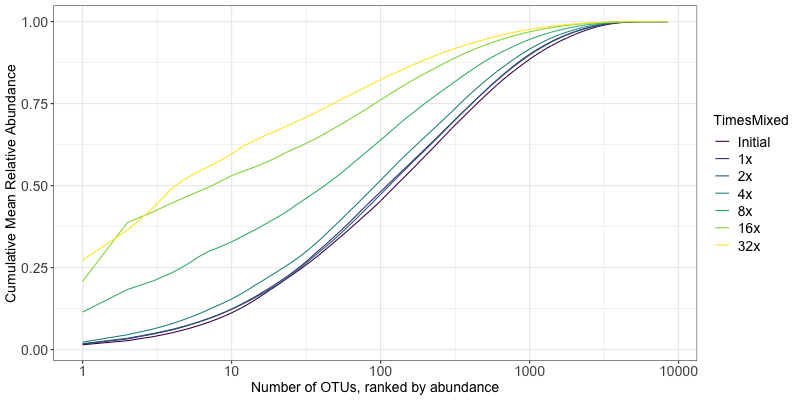

In [10]:
%%R -w 800 -h 400
test.all$TimesMixed = revalue(test.all$TimesMixed,c("Initial"="Initial","x1"="1x","x2"="2x","x4"="4x","x8"="8x","x16"="16x","x32"="32x"))
test.all$TimesMixed = as.factor(test.all$TimesMixed)
test.all$TimesMixed = ordered(test.all$TimesMixed, levels = c("Initial", "1x", "2x", "4x", "8x", "16x", "32x"))
test.all$Rank = as.numeric(paste(test.all$Rank))
test.all$CumulativeAbundance = as.numeric(paste(test.all$CumulativeAbundance))

p = ggplot(test.all, aes(x=Rank,y=CumulativeAbundance,colour=TimesMixed))
p = p + geom_line()
p = p + scale_x_continuous(trans="log10")
p = p + ylab("Cumulative Mean Relative Abundance") + xlab("Number of OTUs, ranked by abundance")
p = p + theme_bw()+
  theme(strip.background = element_rect(colour="white", fill="white"),
       axis.text = element_text(size=14),
       axis.title = element_text(size=14),
       legend.text = element_text(size=14),
       legend.title = element_text(size=14))
p

In [ ]:
#%%R
#ggsave(filename = "RankAbund.2.pdf", plot = p, width=8, height =6)